Predicts whether a person will have a diabetes or not 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [27]:
# Load the dataset
dataset = pd.read_csv('diabetes.csv')

# Display dataset info
print(dataset.shape)
print(dataset.head())

# Check for missing values
print(dataset.isnull().sum())  # Should be all zeros initially


(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148           72.0           35.0        0  33.6   
1            1       85            NaN           29.0        0  26.6   
2            8      183           64.0            0.0        0  23.3   
3            1       89           66.0           23.0       94  28.1   
4            0      137           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               3
SkinThickness               2
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [29]:
# Replace 0s with NaN for selected columns
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]

for column in columns_to_replace:
    dataset[column] = dataset[column].replace(0, np.NaN)  # Replace 0 with NaN
    dataset[column] = dataset[column].fillna(dataset[column].mean())  # Replace NaN with mean


In [30]:
X = dataset.drop('Outcome', axis=1)  # Features
y = dataset['Outcome']  # Target


In [31]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print(y.value_counts())


Outcome
1    500
0    500
Name: count, dtype: int64


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
Data Vizualization

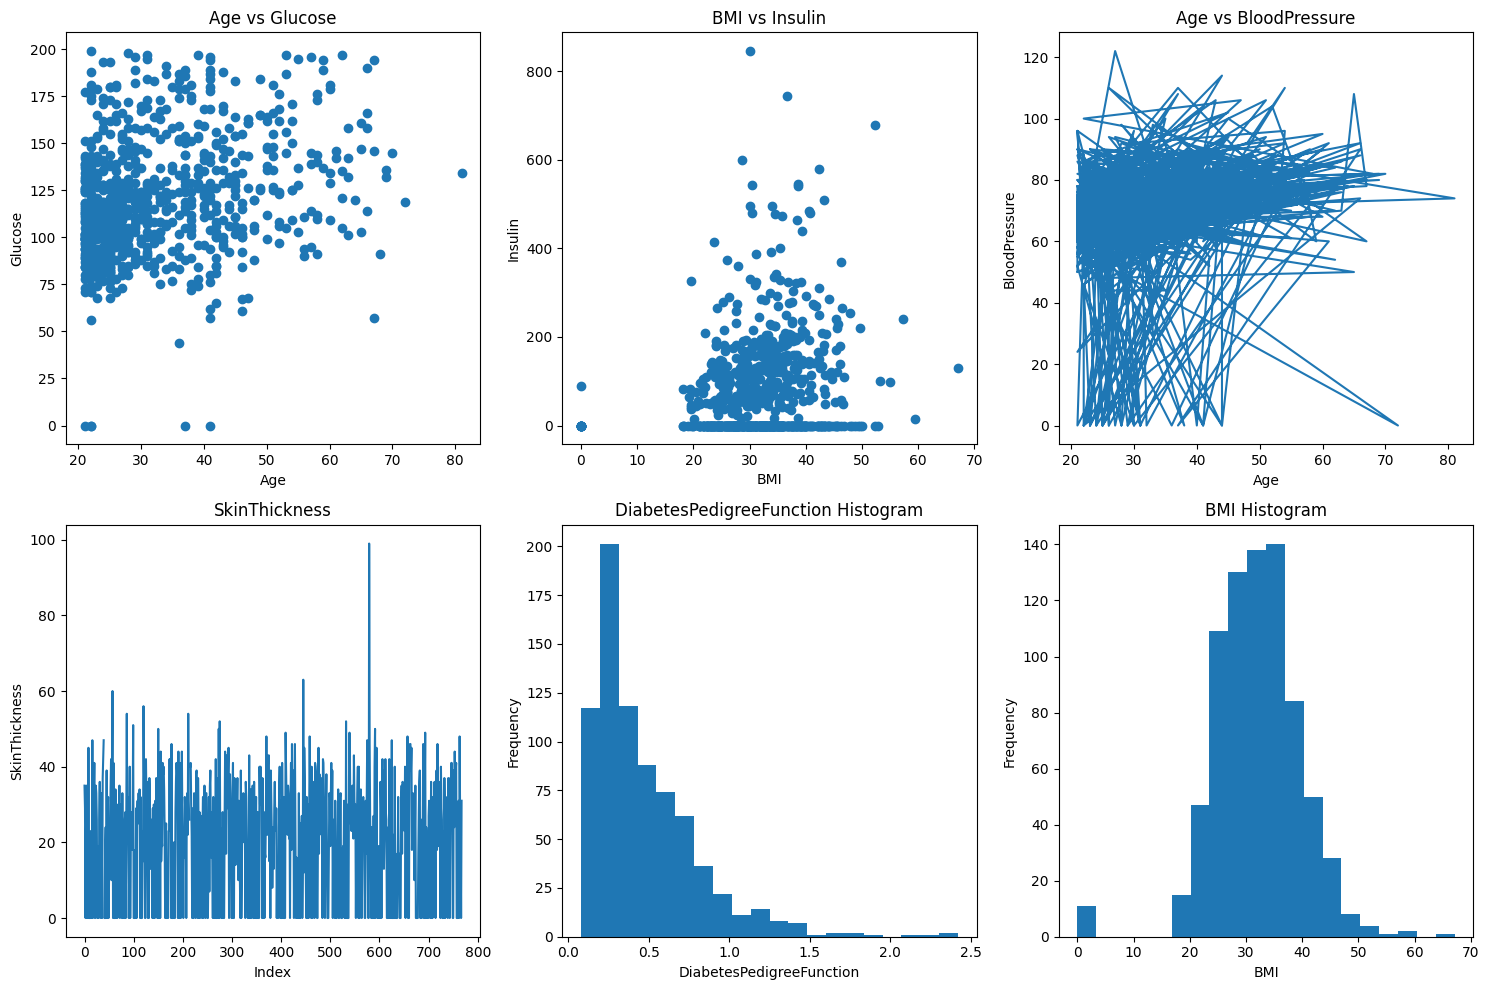

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file into a DataFrame
dataset = pd.read_csv('diabetes.csv')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot scatter plots
axes[0, 0].scatter(dataset['Age'], dataset['Glucose'])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Glucose')
axes[0, 0].set_title('Age vs Glucose')

axes[0, 1].scatter(dataset['BMI'], dataset['Insulin'])
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Insulin')
axes[0, 1].set_title('BMI vs Insulin')

# Plot line graphs
axes[0, 2].plot(dataset['Age'], dataset['BloodPressure'])
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('BloodPressure')
axes[0, 2].set_title('Age vs BloodPressure')

axes[1, 0].plot(dataset['SkinThickness'])
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('SkinThickness')
axes[1, 0].set_title('SkinThickness')

# Plot histograms
axes[1, 1].hist(dataset['DiabetesPedigreeFunction'], bins=20)
axes[1, 1].set_xlabel('DiabetesPedigreeFunction')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('DiabetesPedigreeFunction Histogram')

axes[1, 2].hist(dataset['BMI'], bins=20)
axes[1, 2].set_xlabel('BMI')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('BMI Histogram')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [22]:

stats = {
    'Parameter': [],
    'Count': [],
    'Sum': [],
    'Range': [],
    'Min': [],
    'Max': [],
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Variance': [],
    'Standard Deviation': []
}

for column in dataset.columns:
    stats['Parameter'].append(column)
    stats['Count'].append(dataset[column].count())
    stats['Sum'].append(dataset[column].sum())
    stats['Range'].append(dataset[column].max() - dataset[column].min())
    stats['Min'].append(dataset[column].min())
    stats['Max'].append(dataset[column].max())
    stats['Mean'].append(dataset[column].mean())
    stats['Median'].append(dataset[column].median())
    stats['Mode'].append(dataset[column].mode()[0])
    stats['Variance'].append(dataset[column].var())
    stats['Standard Deviation'].append(dataset[column].std())


stats_df = pd.DataFrame(stats)


print(stats_df)


                  Parameter  Count            Sum    Range     Min     Max  \
0               Pregnancies    768    2953.000000   17.000   0.000   17.00   
1                   Glucose    768   93455.433814  155.000  44.000  199.00   
2             BloodPressure    768   55633.709589   98.000  24.000  122.00   
3             SkinThickness    768   22391.688312   92.000   7.000   99.00   
4                   Insulin    768  119461.035533  832.000  14.000  846.00   
5                       BMI    768   24927.332100   48.900  18.200   67.10   
6  DiabetesPedigreeFunction    768     362.401000    2.342   0.078    2.42   
7                       Age    768   25529.000000   60.000  21.000   81.00   
8                   Outcome    768     268.000000    1.000   0.000    1.00   

         Mean      Median        Mode     Variance  Standard Deviation  
0    3.845052    3.000000    1.000000    11.354056            3.369578  
1  121.686763  117.000000   99.000000   926.346983           30.435949  


In [ ]:
KNN Model

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)  # Default k=5
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate Performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.74        99
           1       0.72      0.92      0.81       101

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.77       200
weighted avg       0.80      0.78      0.78       200


Confusion Matrix:
 [[63 36]
 [ 8 93]]


In [35]:
param_grid = {'n_neighbors': list(range(1, 21))}  # Try different k values
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k: {best_k}")

# Train with optimal k
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train, y_train)

# Predict & Evaluate Again
y_pred_opt = knn_optimized.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, y_pred_opt)}")


Optimal k: 3
Optimized Accuracy: 0.78


In [ ]:
Random Forest Classifier (RFC) 

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10]  # Min samples to split a node
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Best Accuracy: {accuracy:.4f}")


Random Forest Best Accuracy: 0.8000


In [ ]:
XGBoost

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.7850


In [ ]:
Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")


SVM Accuracy: 0.7900
